In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

df = pd.read_csv("breast__cancer.txt", index_col= 0)
print(df.head(10))

         clump-thickness  uniformity-of-cell-size  uniformity-of-cell-shape  \
ID                                                                            
1000025                5                        1                         1   
1002945                5                        4                         4   
1015425                3                        1                         1   
1016277                6                        8                         8   
1017023                4                        1                         1   
1017122                8                       10                        10   
1018099                1                        1                         1   
1018561                2                        1                         2   
1033078                2                        1                         1   
1033078                4                        2                         1   

         marginal adhension  single epi cell size b

In [4]:
#To check for null_values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
clump-thickness             699 non-null int64
uniformity-of-cell-size     699 non-null int64
uniformity-of-cell-shape    699 non-null int64
marginal adhension          699 non-null int64
single epi cell size        699 non-null int64
bare nuclei                 699 non-null object
bland chromatin             699 non-null int64
Normal Nucleoli             699 non-null int64
mitoses                     699 non-null int64
class                       699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


AxesSubplot(0.125,0.125;0.775x0.755)


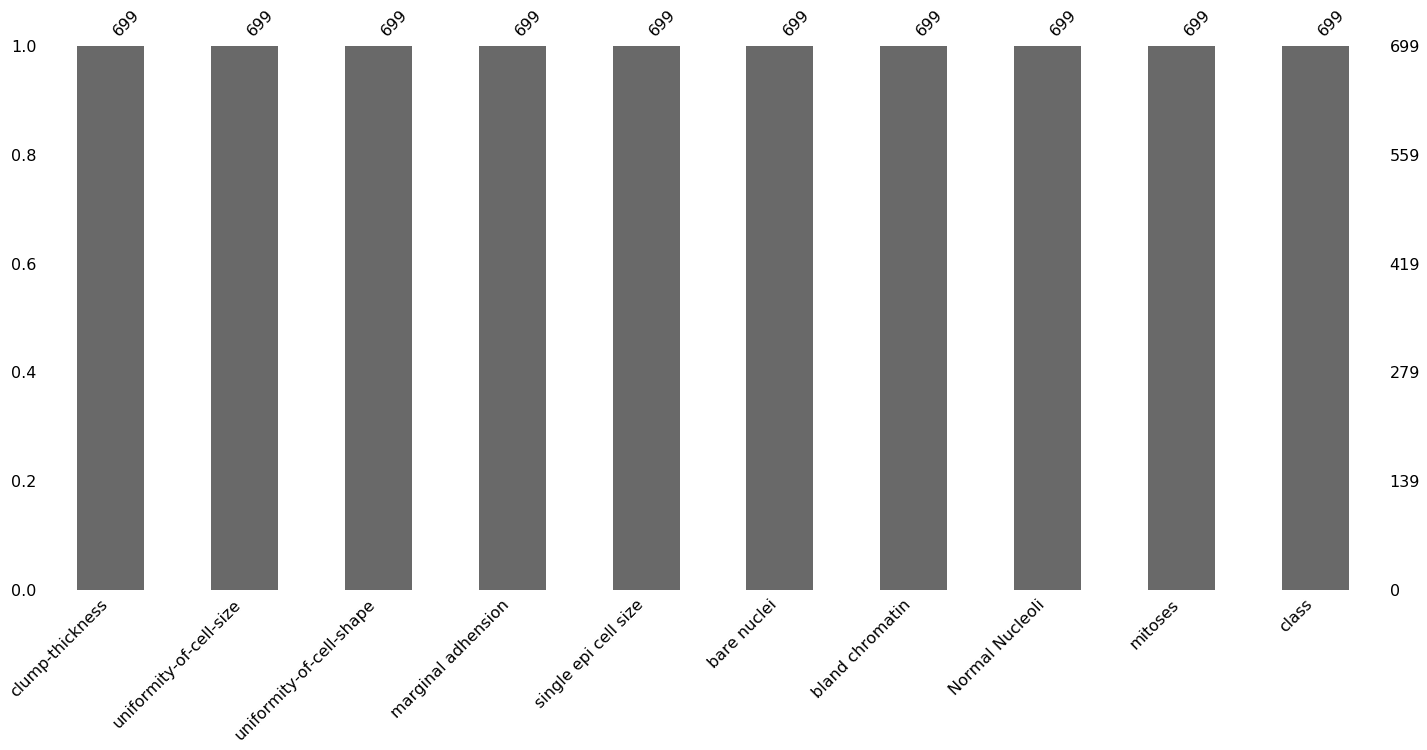

In [5]:
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno

print(msno.bar(df))
#axis([0, 80, 0, 120])


In [6]:

print(df["bare nuclei"].value_counts())

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare nuclei, dtype: int64


## Exploratory Data Analysis

In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal adhension,single epi cell size,bland chromatin,Normal Nucleoli,mitoses,class
clump-thickness,1,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
uniformity-of-cell-size,0.644913,1,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniformity-of-cell-shape,0.654589,0.906882,1,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal adhension,0.486356,0.705582,0.683079,1,0.599599,0.666715,0.603352,0.417633,0.6968
single epi cell size,0.521816,0.751799,0.719668,0.599599,1,0.616102,0.628881,0.479101,0.682785
bland chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1,0.42317
class,0.716001,0.817904,0.818934,0.6968,0.682785,0.756616,0.712244,0.42317,1


In [8]:
df = df[pd.to_numeric(df['bare nuclei'], errors='coerce').notnull()]
print(df["bare nuclei"].value_counts())

df['bare nuclei'] = df.loc[ :,'bare nuclei'].astype('int64')
df.dtypes

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare nuclei, dtype: int64


clump-thickness             int64
uniformity-of-cell-size     int64
uniformity-of-cell-shape    int64
marginal adhension          int64
single epi cell size        int64
bare nuclei                 int64
bland chromatin             int64
Normal Nucleoli             int64
mitoses                     int64
class                       int64
dtype: object

In [9]:
#to see the summary statistics
df.describe()

,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal adhension,single epi cell size,bare nuclei,bland chromatin,Normal Nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# DATA VISUALIZATION

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

In [11]:
df_vis = df.copy()
df_vis.head()

,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal adhension,single epi cell size,bare nuclei,bland chromatin,Normal Nucleoli,mitoses,class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
def label(element):
    if element == 2:
        return 'Bening'
    else:
        return 'Malignant'
    
class_value = df_vis['class'].map(label)
df_vis['class']= class_value

print(df_vis.head(10))

print(df_vis.shape)

         clump-thickness  uniformity-of-cell-size  uniformity-of-cell-shape  \
ID                                                                            
1000025                5                        1                         1   
1002945                5                        4                         4   
1015425                3                        1                         1   
1016277                6                        8                         8   
1017023                4                        1                         1   
1017122                8                       10                        10   
1018099                1                        1                         1   
1018561                2                        1                         2   
1033078                2                        1                         1   
1033078                4                        2                         1   

         marginal adhension  single epi cell size  

444
239


Text(0.5, 1.0, 'Number of Benign and Malignant Samples')

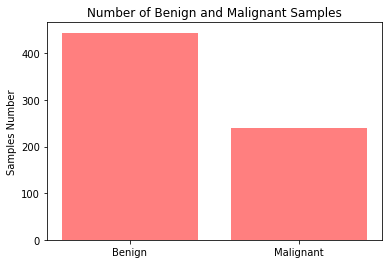

In [13]:
Bening_value = df_vis[df_vis["class"]== "Bening"].shape[0]
Malignant_value = df_vis[df_vis["class"]== "Malignant"].shape[0]
print(Bening_value )
print(Malignant_value)


objects = ('Benign', 'Malignant')
bar_position = np.arange(len(objects))
bar_height = [Bening_value,Malignant_value]

plt.bar(bar_position, bar_height, align='center', alpha=0.5, color = 'red')
plt.xticks(bar_position, objects)
plt.ylabel('Samples Number')
plt.title('Number of Benign and Malignant Samples')

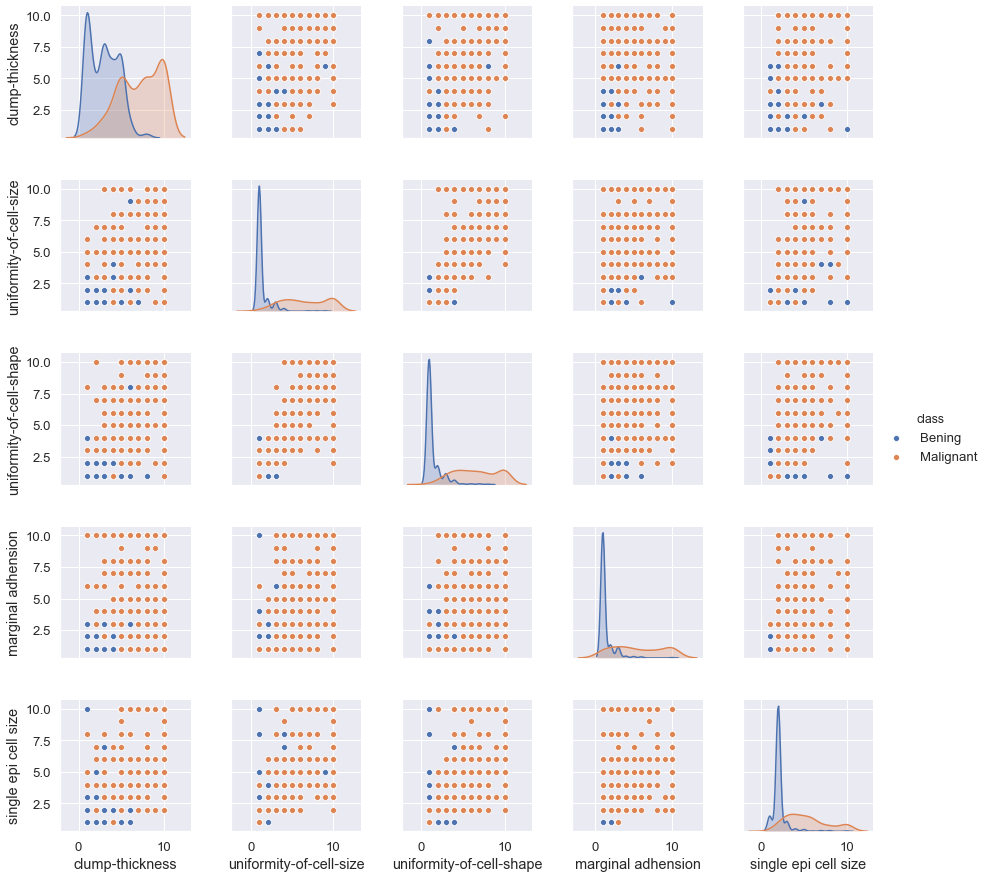

In [14]:
sns.set()
with sns.plotting_context("notebook", font_scale=1.2):
    sns.pairplot(df_vis,vars=['clump-thickness', 'uniformity-of-cell-size', 'uniformity-of-cell-shape', 'marginal adhension', 'single epi cell size'],hue='class')

plt.show()

In [43]:
#step 11 (data standardization)
from sklearn.preprocessing import StandardScaler
#Seperating out the features
 
df_prep = df.copy()
x = np.array(df_prep.drop(['class'],axis= 1))

# Seperating out the target
Y = np.array(df_prep['class'])

#Standardizing the features 
X = StandardScaler().fit_transform(x)
# print(X[0:5])


[0.65549993 0.08621632 0.05991692]


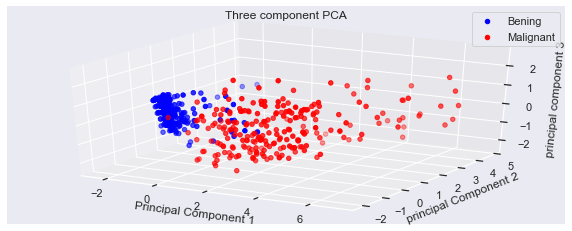

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3' ])
print(pca.explained_variance_ratio_)
new_df = np.array(principalDf)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_df[Y == 2][:, 0], new_df[Y == 2][:, 1],new_df[Y == 2][:, 2], color='blue', label='Bening')
ax.scatter(new_df[Y == 4][:, 0], new_df[Y == 4][:, 1], new_df[Y == 4][:, 2], color='red', label='Malignant')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('principal Component 2')
ax.set_zlabel('principal component 3')
plt.title("Three component PCA")
plt.legend();


[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]
[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 683 samples in 0.002s...
[t-SNE] Computed neighbors for 683 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 683 / 683
[t-SNE] Mean sigma: 0.945900
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.972908
[t-SNE] KL divergence after 300 iterations: 0.653549


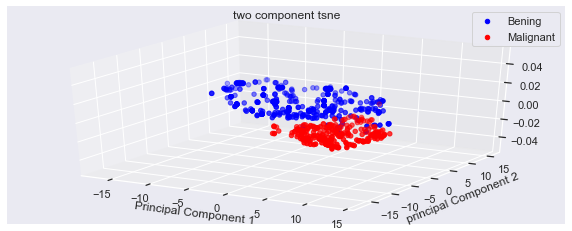

In [41]:
from sklearn.manifold import TSNE
import seaborn as sns
print(X)
tsne = TSNE(n_components=2, verbose=1, perplexity=38, n_iter=300)
tsne_results = tsne.fit_transform(X)
principalDf = pd.DataFrame(data = tsne_results 
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf.head(10))


new_df = np.array(principalDf)
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(new_df[Y == 2][:, 0], new_df[Y == 2][:, 1], color='blue', label='Bening')
ax.scatter(new_df[Y == 4][:, 0], new_df[Y == 4][:, 1], color='red', label='Malignant')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('principal Component 2')
plt.title("two component tsne")
plt.legend();

# Cluster Analysis

0.9575402635431918


Text(0.5, 1.0, 'Actual clusters')

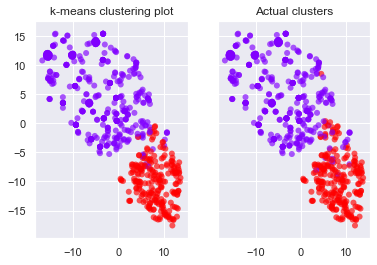

In [45]:
#cluster analysis with standardization
#kmeans
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=12, copy_x=True, n_jobs=-1, algorithm='auto')

df_kmeans = df.copy()
x = np.array(df_kmeans.drop(['class'],axis= 1))

# Seperating out the target
Y = np.array(df_kmeans['class'])

#Standardizing the features 
X = StandardScaler().fit_transform(x)
kY = kmns.fit_predict(X)

new_Ky =[]

def change(element):
    if element == 0:
        element = 2
    else:
        element = 4
    new_Ky.append(element)
    
for element in kY:
    change(element)
kmeans_y = np.array(new_Ky)


count = 0
for x in range(len(Y)):
    if Y[x] == kmeans_y [x]:
        count = count + 1
accuracy = count/(len(Y))
print(accuracy)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(tsne_results[:,0],tsne_results[:,1],  c=kY,cmap = "rainbow", edgecolor = "None", alpha=0.65)
ax1.set_title('k-means clustering plot')

ax2.scatter(tsne_results[:,0],tsne_results[:,1],  c = Y, cmap = "rainbow", edgecolor = "None", alpha=0.65)
ax2.set_title('Actual clusters')



0.9282576866764275


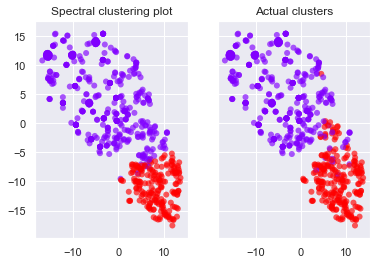

In [44]:
#cluster analysis with standardization
#spectral_clustering

from sklearn.cluster import SpectralClustering
# Play with gamma to optimize the clustering results
df_spectral = df.copy()
x = np.array(df_spectral.drop(['class'],axis= 1))

# Seperating out the target
Y = np.array(df_spectral['class'])

#Standardizing the features 
X = StandardScaler().fit_transform(x)

spectral = SpectralClustering(n_clusters=2,  gamma=0.5, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)
kS = spectral.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(tsne_results[:,0],tsne_results[:,1],  c=kS, cmap = "rainbow", edgecolor = "None", alpha=0.65)
ax1.set_title('Spectral clustering plot')

ax2.scatter(tsne_results[:,0],tsne_results[:,1],  c = Y, cmap = "rainbow", edgecolor = "None", alpha=0.65)
ax2.set_title('Actual clusters')

spectral_Ky =[]
def change(element):
    if element == 0:
        element = 2
    else:
        element = 4
    spectral_Ky.append(element)
    
for element in kS:
    change(element)
spectral_y = np.array(spectral_Ky)

count = 0
for x in range(len(Y)):
    if Y[x] == spectral_y[x]:
        count = count + 1
accuracy = count/(len(Y))
print(accuracy)

0.032210834553440704


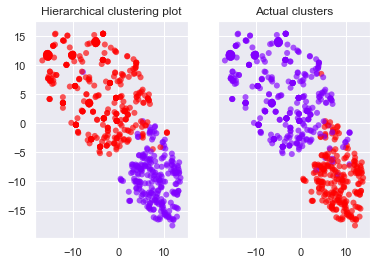

In [47]:
#agglomerative clustering with standardization

from sklearn.cluster import AgglomerativeClustering

# Play with gamma to optimize the clustering results
df_Agglo = df.copy()
x = np.array(df_Agglo.drop(['class'],axis= 1))

# Seperating out the target
Y = np.array(df_Agglo['class'])

#Standardizing the features 
X = StandardScaler().fit_transform(x)

aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
kA = aggC.fit_predict(X)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(tsne_results[:,0],tsne_results[:,1],  c=kA, cmap = "rainbow", edgecolor = "None", alpha=0.65)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(tsne_results[:,0],tsne_results[:,1],  c = Y, cmap = "rainbow", edgecolor = "None", alpha=0.65)
ax2.set_title('Actual clusters')

Agglo_Ky =[]
def change(element):
    if element == 0:
        element = 2
    else:
        element = 4
    Agglo_Ky.append(element)
    
for element in kA:
    change(element)
Agglo_y = np.array(Agglo_Ky)

count = 0
for x in range(len(Y)):
    if Y[x] == Agglo_y[x]:
        count = count + 1
accuracy = count/(len(Y))
print(accuracy)

0.8740849194729137


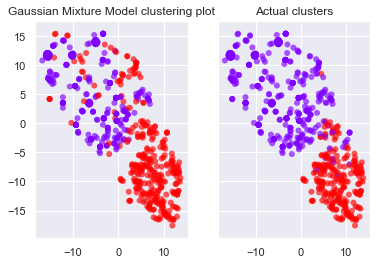

In [49]:
#clustering using gmm

from sklearn.mixture import GaussianMixture

df_Gauss = df.copy()
x = np.array(df_Gauss.drop(['class'],axis= 1))

# Seperating out the target
Y = np.array(df_Gauss['class'])

#Standardizing the features 
X = StandardScaler().fit_transform(x)

Gaus = GaussianMixture(n_components=2)
kG = Gaus.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(tsne_results[:,0],tsne_results[:,1],  c=kG, cmap = "rainbow", edgecolor = "None", alpha=0.65)
ax1.set_title('Gaussian Mixture Model clustering plot')

ax2.scatter(tsne_results[:,0],tsne_results[:,1],  c = Y, cmap = "rainbow", edgecolor = "None", alpha=0.65)
ax2.set_title('Actual clusters')

Gaus_Ky =[]

def change(element):
    if element == 0:
        element = 2
    else:
        element = 4
    Gaus_Ky.append(element)
    
for element in kG:
    change(element)
Gaus_y = np.array(Gaus_Ky)

count = 0
for x in range(len(Y)):
    if Y[x] == Gaus_y[x]:
        count = count + 1
accuracy = count/(len(Y))
print(accuracy)

# Cluster Evaluation

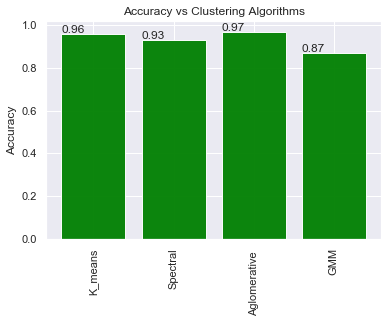

In [51]:
K_means_C = 0.96
Spectral_C = 0.93
Aglomerative_C = 0.97
GMM_C = 0.87

objects = ('K_means', 'Spectral', 'Aglomerative ', 'GMM')
bar_position = np.arange(len(objects))
bar_height = [K_means_C, Spectral_C,Aglomerative_C , GMM_C]
xlocs, xlabs = plt.xticks()

bars = plt.bar(bar_position, bar_height, align='center', alpha=0.95, color = 'green')
plt.xticks(bar_position, objects, rotation=90)
plt.ylabel('Accuracy')
plt.title('Accuracy vs Clustering Algorithms')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()

# Exploring Agglomerative clustering

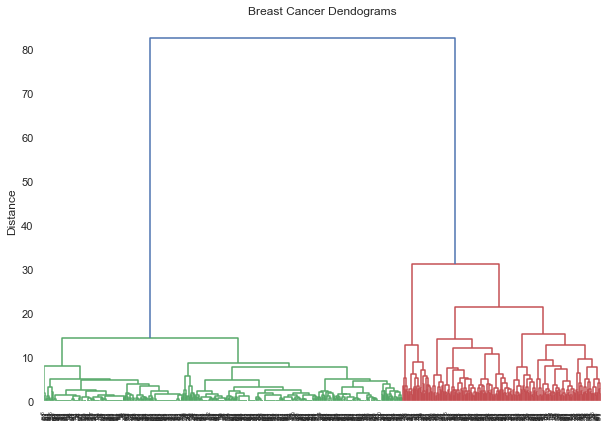

In [23]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Breast Cancer Dendograms")
plt.ylabel('Distance')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

Text(0.5, 1.0, 'Actual clusters')

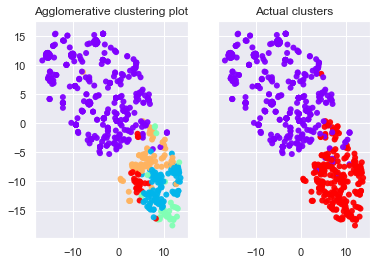

In [62]:
#choose 5 clusters because the they have the small dismillarity values. 

aggC = AgglomerativeClustering(n_clusters=5, linkage='ward')
kA = aggC.fit_predict(X)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(tsne_results[:,0],tsne_results[:,1],  c=kA, cmap = "rainbow", edgecolor = "None", alpha=0.95)
ax1.set_title('Agglomerative clustering plot')

ax2.scatter(tsne_results[:,0],tsne_results[:,1],  c = Y, cmap = "rainbow", edgecolor = "None", alpha=0.95)
ax2.set_title('Actual clusters')

In [56]:
#assigning the new colum to the dataframe
adf = pd.read_csv("breast__cancer.txt")
adf = adf.drop(['ID'], axis= 1)
adf = adf[pd.to_numeric(adf['bare nuclei'], errors='coerce').notnull()]
adf['bare nuclei'] = adf.loc[ :,'bare nuclei'].astype('int64')
a_y = pd.DataFrame({'Clusters_5': kA[0:,]})
adf['Clusters_5'] = a_y
print(adf.head(5))

   clump-thickness  uniformity-of-cell-size  uniformity-of-cell-shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   marginal adhension  single epi cell size  bare nuclei  bland chromatin  \
0                   1                     2            1                3   
1                   5                     7           10                3   
2                   1                     2            2                3   
3                   1                     3            4                3   
4                   3                     2            1                3   

   Normal Nucleoli  mitoses  class  Clusters_5  
0                1        1      2         0.0  


In [57]:
# Manipulating the data set
grouped = adf.groupby('Clusters_5')
class_0 = grouped.get_group(0.0)
class_0_class = class_0['class'].value_counts()
print(class_0_class)

class_1 = grouped.get_group(1.0)
class_1_class = class_1['class'].value_counts()
print(class_1_class)

class_2 = grouped.get_group(2.0)
class_2_class = class_2['class'].value_counts()
print(class_2_class)

class_3 = grouped.get_group(3.0)
class_3_class = class_3['class'].value_counts()
print(class_3_class)

class_4 = grouped.get_group(4.0)
class_4_class = class_4['class'].value_counts()
print(class_4_class)
# print(grouped.size())
y= grouped.mean()
# print(y)

2    297
4    134
Name: class, dtype: int64
2    58
4    40
Name: class, dtype: int64
2    23
4    12
Name: class, dtype: int64
2    39
4    38
Name: class, dtype: int64
2    15
4    11
Name: class, dtype: int64


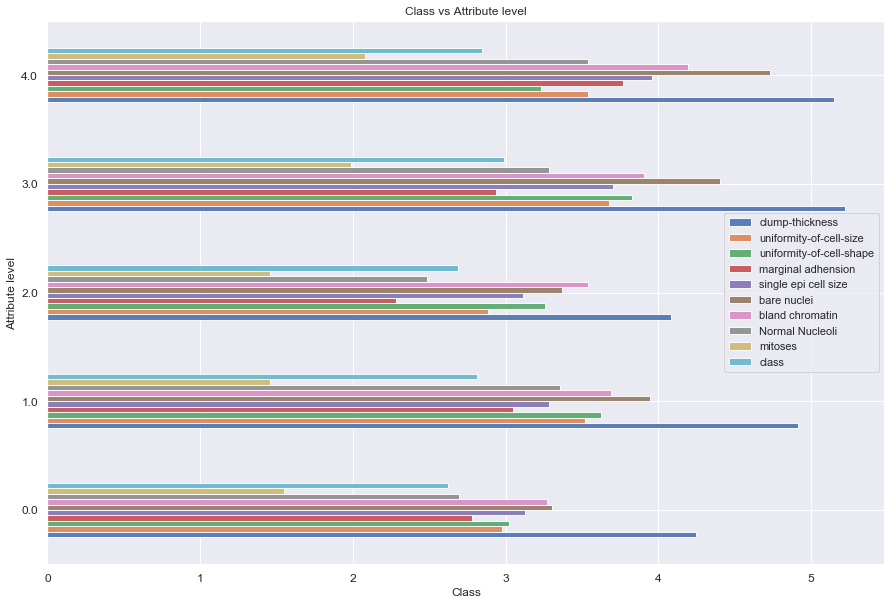

In [58]:
ax = y.plot(kind='barh', title ="Class vs Attribute level",figsize=(15,10),legend=True, fontsize=12, alpha=0.9)
ax.set_xlabel("Class",fontsize=12)
ax.set_ylabel("Attribute level",fontsize=12)


# import matplotlib.pyplot as plt
# ax = df[['V1','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)
plt.show()

### conclusion 
1. class 0 - represents people who are very benign.
2. class 1- represents people who are in stage 1 or 2 of cancer
3. class 2- represents peoplw whoa are benign but still they are very prone to being malignant
4. class 3- represents people who are like in the stage 3 of the cancer
5. class 4- represents people who are in stage 4 of cancer.